In [1]:
import pandas as pd
import numpy as np

#### Read File

In [37]:
titanic = pd.read_csv("titanic.csv", na_values=[""," ","?","NA"])

In [3]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,1,Allen Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,St Louis MO
1,1,1,Allison Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,Montreal PQ / Chesterville ON
2,1,0,Allison Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal PQ / Chesterville ON
3,1,0,Allison Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Montreal PQ / Chesterville ON
4,1,0,Allison Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal PQ / Chesterville ON


In [7]:
type(titanic)

pandas.core.frame.DataFrame

In [6]:
titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home_dest     object
dtype: object

#### Feature Selection

In [38]:
colsToUse = ["age", "pclass","fare","sibsp","parch","survived","sex","embarked"]

In [39]:
titanic = titanic[colsToUse]
#titanic = titanic.loc[:,colsToUse]

In [16]:
titanic.head()

,age,pclass,fare,sibsp,parch,survived,sex,embarked
0,29.0000,1,211.3375,0,0,1,female,S
1,0.9167,1,151.5500,1,2,1,male,S
2,2.0000,1,151.5500,1,2,0,female,S
3,30.0000,1,151.5500,1,2,0,male,S
4,25.0000,1,151.5500,1,2,0,female,S


In [6]:
titanic.describe()

,age,pclass,fare,sibsp,parch,survived
count,1046.000000,1309.000000,1308.000000,1309.000000,1309.000000,1309.000000
mean,29.881135,2.294882,33.295479,0.498854,0.385027,0.381971
std,14.413500,0.837836,51.758668,1.041658,0.865560,0.486055
min,0.166700,1.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,7.895800,0.000000,0.000000,0.000000
50%,28.000000,3.000000,14.454200,0.000000,0.000000,0.000000
75%,39.000000,3.000000,31.275000,1.000000,0.000000,1.000000
max,80.000000,3.000000,512.329200,8.000000,9.000000,1.000000


#### Missing Values

In [40]:
miss = titanic.isnull().sum()
miss = miss[miss>0]

In [41]:
miss.index

Index(['age', 'fare', 'embarked'], dtype='object')

In [42]:
# Hold Shift + Tab for help on any method/function
titanic['age'].fillna(value = titanic['age'].median(), inplace = True)
titanic['fare'].fillna(value = titanic['fare'].median(), inplace = True)
titanic['embarked'].fillna(value = titanic['embarked'].mode()[0], inplace = True)

In [43]:
titanic.isnull().sum()

age         0
pclass      0
fare        0
sibsp       0
parch       0
survived    0
sex         0
embarked    0
dtype: int64

In [44]:
# Converting to strings/objects
titanic['pclass'] = titanic['pclass'].astype("object")
#titanic['survived'] = titanic['survived'].astype("object") # LogReg needs this to be a num value

In [45]:
titanic.dtypes

age         float64
pclass       object
fare        float64
sibsp         int64
parch         int64
survived      int64
sex          object
embarked     object
dtype: object

In [9]:
titanic.corr()

,age,fare,sibsp,parch
age,1.000000,0.178182,-0.189972,-0.125851
fare,0.178182,1.000000,0.160349,0.221635
sibsp,-0.189972,0.160349,1.000000,0.373587
parch,-0.125851,0.221635,0.373587,1.000000


#### EDA in python to be repeated as done in R

In [10]:
from plotnine import *

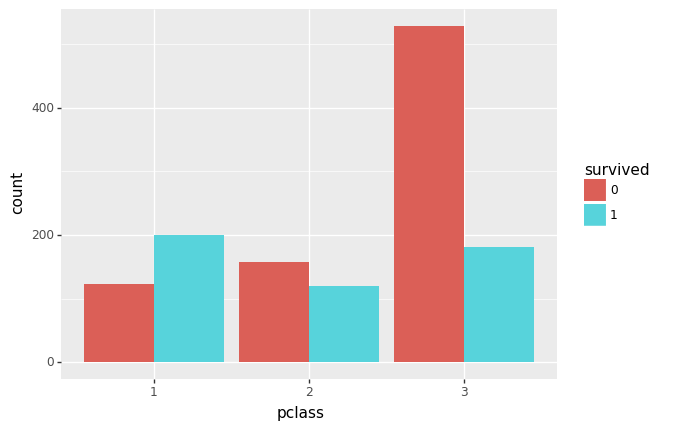

<ggplot: (-9223371936419359607)>

In [16]:
ggplot(titanic)+ geom_bar(aes("pclass", fill="survived"), position="dodge")

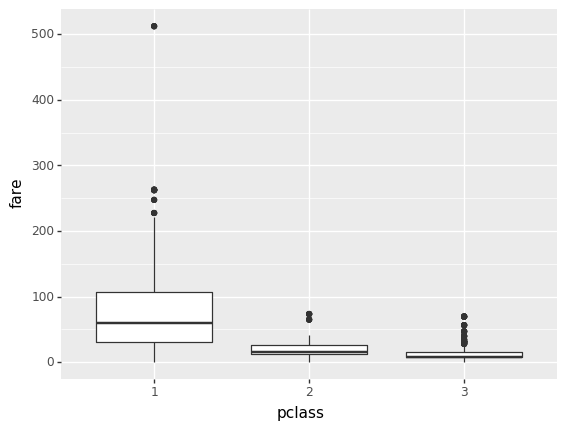

<ggplot: (100435564040)>

In [18]:
ggplot(titanic)+ geom_boxplot(aes(x= "pclass", y="fare"))

In [46]:
y = titanic["survived"]
X = titanic.drop(['survived'],axis=1)

In [47]:
X.head()

,age,pclass,fare,sibsp,parch,sex,embarked
0,29.0000,1,211.3375,0,0,female,S
1,0.9167,1,151.5500,1,2,male,S
2,2.0000,1,151.5500,1,2,female,S
3,30.0000,1,151.5500,1,2,male,S
4,25.0000,1,151.5500,1,2,female,S


In [48]:
X = pd.get_dummies(X, drop_first=True)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [50]:
X_train, X_test, y_train, y_test  = train_test_split(X, y,test_size= 0.3, random_state = 123)

In [80]:
clf = LogisticRegression(class_weight = "balanced")
clf.fit(X_train, y_train)

c:\users\phsivale\appdata\local\continuum\anaconda3\envs\gsk37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
dict(zip(X_train.columns, clf.coef_[0]))

{'age': -0.03194006206469068,
 'fare': 0.0028043413090236007,
 'sibsp': -0.2790853551794299,
 'parch': 0.027732355552420276,
 'pclass_2': -0.58264503643515,
 'pclass_3': -1.390239885903382,
 'sex_male': -2.23560789733165,
 'embarked_Q': -0.4627092091180624,
 'embarked_S': -0.6274581514859378}

In [64]:
clf.predict_proba(X_test) # For probilities

array([[0.26447079, 0.73552921],
       [0.88397313, 0.11602687],
       [0.22949512, 0.77050488],
       [0.59491472, 0.40508528],
       [0.79470451, 0.20529549],
       [0.80437541, 0.19562459],
       [0.13739452, 0.86260548],
       [0.46209577, 0.53790423],
       [0.86427004, 0.13572996],
       [0.3961039 , 0.6038961 ],
       [0.82783623, 0.17216377],
       [0.520601  , 0.479399  ],
       [0.07009188, 0.92990812],
       [0.75852876, 0.24147124],
       [0.48247732, 0.51752268],
       [0.43912638, 0.56087362],
       [0.09410733, 0.90589267],
       [0.61719829, 0.38280171],
       [0.71694452, 0.28305548],
       [0.73394492, 0.26605508],
       [0.81348635, 0.18651365],
       [0.78839768, 0.21160232],
       [0.26345133, 0.73654867],
       [0.13976648, 0.86023352],
       [0.87018561, 0.12981439],
       [0.62007033, 0.37992967],
       [0.61651067, 0.38348933],
       [0.25391628, 0.74608372],
       [0.67416592, 0.32583408],
       [0.85114523, 0.14885477],
       [0.

In [82]:
preds = clf.predict(X_test) # For 0/1

In [83]:
from sklearn.metrics import confusion_matrix, classification_report

In [69]:
confusion_matrix(y_test, preds)

array([[214,  30],
       [ 45, 104]], dtype=int64)

In [84]:
confusion_matrix(y_test, preds)

array([[199,  45],
       [ 38, 111]], dtype=int64)

In [71]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       244
           1       0.78      0.70      0.73       149

    accuracy                           0.81       393
   macro avg       0.80      0.79      0.79       393
weighted avg       0.81      0.81      0.81       393



In [85]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       244
           1       0.71      0.74      0.73       149

    accuracy                           0.79       393
   macro avg       0.78      0.78      0.78       393
weighted avg       0.79      0.79      0.79       393



In [73]:
preds = clf.predict_proba(X_test)

In [79]:
pd.DataFrame(preds)[1]

0      0.735529
1      0.116027
2      0.770505
3      0.405085
4      0.205295
         ...   
388    0.834635
389    0.075227
390    0.877225
391    0.362384
392    0.118122
Name: 1, Length: 393, dtype: float64